<a href="https://colab.research.google.com/github/Tanuja2725/Visualization/blob/main/Airbnb_NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Analysis

**Starting the Analysis**

First and foremost, we import all modules that will be used for this analysis. 

In [ ]:
import pandas as pd
import math
from scipy import stats
import seaborn as sns
sns.set()
import matplotlib as plt

We retrieve our data from a repository that we created on Github. The file is a csv
so we will need to use the pd.read_csv() method.  

In [ ]:
url ='https://raw.githubusercontent.com/benjaminbellman/Airbnb_NYC/master/AB_NYC_2019.csv'
airbnb_df = pd.read_csv(url)


We then proceed to inspect the skeleton of our data. 
We see that there are over 48,895 different rows of data across 16 different columns. 

In [ ]:
airbnb_df.shape

(48895, 16)

We then want to inspect our data and see the columns it contains. 


In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

We then want to preview  what this data will look like. Sampled below are the first 10 rows. 

In [ ]:
airbnb_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


We proceed to briefly look at the descriptive statistics of the dataset.

In [ ]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Observing the Columns in Details**

The following code will illustrate all the different unique values in each columns. 
We are interested in the number of different boroughs, neighborhoods and room types.

In [ ]:
print(' The number of different boroughs in this dataset is: ' + str(airbnb_df['neighbourhood_group'].nunique()))

print(airbnb_df.neighbourhood_group.unique())
print('  ')
print(' The number of different neighborhoods in this dataset is: ' + str(airbnb_df['neighbourhood'].nunique()))
print(airbnb_df.neighbourhood.unique())
print('  ')
print(' The number amount of different types of rooms in this dataset is: ' + str(airbnb_df['room_type'].nunique()))
print(airbnb_df.room_type.unique())

 The number of different boroughs in this dataset is: 5
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
  
 The number of different neighborhoods in this dataset is: 221
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbus

**1) Analyzing the different boroughs and their listings' average nightly prices.**

The following code will create databases that contain only the borough in question. 
Brooklyn_df will contain all the data for the listings where the neighbourhood_group will be Brooklyn, for example.

In [ ]:
Brooklyn = (airbnb_df['neighbourhood_group'] == 'Brooklyn')
Brooklyn_df = airbnb_df[Brooklyn.values]


Manhattan = (airbnb_df['neighbourhood_group'] == 'Manhattan')
Manhattan_df = airbnb_df[Manhattan.values]


Staten_Island = (airbnb_df['neighbourhood_group'] == 'Staten Island')
Staten_Island_df = airbnb_df[Staten_Island.values]


Queens = (airbnb_df['neighbourhood_group'] == 'Queens')
Queens_df = airbnb_df[Queens.values]


Bronx = (airbnb_df['neighbourhood_group'] == 'Bronx')
Bronx_df = airbnb_df[Bronx.values]
Bronx_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2019-07-04,2.04,3,353
207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,2019-06-30,1.45,3,323
260,63588,LL3,295128,Carol Gloria,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,NaN,NaN,7,349
261,63610,DOMINIQUE'S NY mini efficiency* wifi*metro*quiet,310670,Vie,Bronx,Eastchester,40.88057,-73.83572,Entire home/apt,105,2,38,2019-06-27,0.50,13,365
309,71812,Condo Apartment with laundry in unit,369015,Thai,Bronx,Kingsbridge,40.87207,-73.90193,Entire home/apt,90,30,4,2019-01-02,0.35,2,346


This code will give us the average listing price for each neighborhood:

In [ ]:
Brooklyn_mean_price = Brooklyn_df['price'].mean()
Manhattan_mean_price = Manhattan_df['price'].mean()
Bronx_mean_price = Bronx_df['price'].mean()
Staten_Island_mean_price = Staten_Island_df['price'].mean()
Queens_mean_price = Queens_df['price'].mean()

print('The mean price of a listing in Brooklyn is: '+ str(Brooklyn_mean_price))
print('The mean price of a listing in Manhattan is: '+ str(Manhattan_mean_price))
print('The mean price of a listing in Bronx is: '+ str(Bronx_mean_price))
print('The mean price of a listing in Staten Island is: '+ str(Staten_Island_mean_price))
print('The mean price of a listing in Queens is: '+ str(Queens_mean_price))


The mean price of a listing in Brooklyn is: 124.38320732192598
The mean price of a listing in Manhattan is: 196.8758136743456
The mean price of a listing in Bronx is: 87.4967919340055
The mean price of a listing in Staten Island is: 114.81233243967829
The mean price of a listing in Queens is: 99.51764913519237


We proceed to test if the price variation between these neighborhoods is statistically significant. We will do this for Manhattan and Brooklyn as they repectively have the highest averages.

In [ ]:
sample_1_n = Brooklyn_df.shape[0]
sample_2_n = Manhattan_df.shape[0]
sample_1_mean = Brooklyn_df['price'].mean()
sample_2_mean = Manhattan_df['price'].mean()
sample_1_var = Brooklyn_df['price'].var()
sample_2_var = Manhattan_df['price'].var()

std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print('The mean for Brooklyn listings is: ' + str(sample_1_mean))
print('The mean for Manhattan listings is: ' + str(sample_2_mean))
print( ' ')
print("The difference in means at the 95% confidence interval is between "+ str(ci_lower)+" and "+str(ci_upper)+".")

The mean for Brooklyn listings is: 124.38320732192598
The mean for Manhattan listings is: 196.8758136743456
 
The difference in means at the 95% confidence interval is between 67.83096486344694 and 77.15424784139232.


We then want to compare Brooklyn and one of the other boroughs as they all seem to have the same averages. We will compare with Queens. 

In [ ]:
sample_1_n = Brooklyn_df.shape[0]
sample_2_n = Queens_df.shape[0]
sample_1_mean = Brooklyn_df['price'].mean()
sample_2_mean = Queens_df['price'].mean()
sample_1_var = Brooklyn_df['price'].var()
sample_2_var = Queens_df['price'].var()

std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print('The mean for Brooklyn listings is: ' + str(sample_1_mean))
print('The mean for Queens\' listings is: ' + str(sample_2_mean))
print( ' ')
print("The difference in means at the 95% confidence interval is between "+ str(ci_lower)+" and "+str(ci_upper)+".")

The mean for Brooklyn listings is: 124.38320732192598
The mean for Queens' listings is: 99.51764913519237
 
The difference in means at the 95% confidence interval is between -29.92571652803202 and -19.805399845435197.


We use boxplots to illustrate the variations of the average neighborhood listing prices.

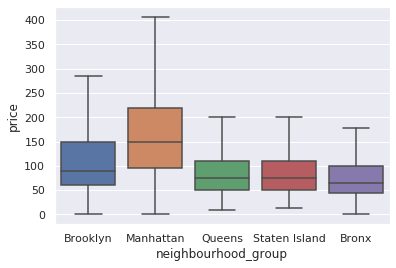

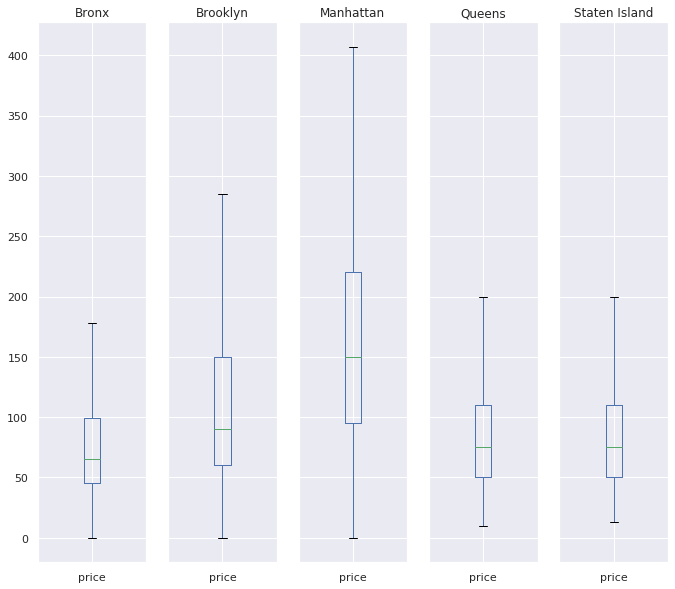

In [ ]:
# Boxplot #1: 

sns.boxplot(y='price', x='neighbourhood_group', data= airbnb_df, showfliers=False)

#Boxplot #2: 
df1 = airbnb_df.groupby('neighbourhood_group')
axes = df1.boxplot(column='price', layout=(1,9), figsize=(20,10), showfliers = False )



*Findings:* 

It appears the most expensive boroughs are Manhattan and Brooklyn. We would want therefore to prioritize the Airbnb marketing strategy to target these boroughs and to recruit more dwelling owners in their neighborhood. With increased rentals in these boroughs, Airbnb's profit would increase. 
We also would want to follow up in a further analysis which are the most expensive neighborhoods. By targeting these places, we would be able to increase the profitability on the listing units. 

**2) Analyzing the difference in prices based on the Room Type**

The following code below creates databases that will contain unique values of the room_type. 
Private_Room_df for example will contain all the records where the room is private.

In [ ]:
Private = (airbnb_df['room_type'] == 'Private room')
Private_room_df = airbnb_df[Private.values]
Private_room_df.head()

Whole = (airbnb_df['room_type'] == 'Entire home/apt')
Whole_place_df = airbnb_df[Whole.values]
Whole_place_df.head()

Shared = (airbnb_df['room_type'] == 'Shared room')
Shared_Room_df = airbnb_df[Shared.values]
Shared_Room_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
39,12048,LowerEastSide apt share shortterm 1,7549,Ben,Manhattan,Lower East Side,40.71401,-73.98917,Shared room,40,1,214,2019-07-05,1.81,4,188
203,54453,MIDTOWN WEST - Large alcove studio,255583,Anka,Manhattan,Hell's Kitchen,40.76548,-73.98474,Shared room,105,6,10,2014-01-07,0.09,1,363
357,99070,Comfortable Cozy Space in El Barrio,522065,Liz And Melissa,Manhattan,East Harlem,40.79406,-73.94102,Shared room,65,7,131,2019-05-26,1.31,2,0
492,173072,Cozy Pre-War Harlem Apartment,826192,Lewis,Manhattan,Harlem,40.80827,-73.95329,Shared room,49,3,168,2019-07-06,4.60,1,248
545,200645,Best Manhattan Studio Deal!,933378,Edo,Manhattan,Upper East Side,40.76739,-73.95570,Shared room,90,1,0,NaN,NaN,1,0


The following code gives us the average listing price for each room type. 

In [ ]:
Private_room_mean_price = Private_room_df['price'].mean()
Whole_place_mean_price = Whole_place_df['price'].mean()
Shared_Room_df_price = Shared_Room_df['price'].mean()

print('The mean price of an Entire place is: '+ str(Whole_place_mean_price))
print('The mean price of a Private Room is: '+ str(Private_room_mean_price))
print('The mean price of a Shared Room is: '+ str(Shared_Room_df_price))


The mean price of an Entire place is: 211.79424613325986
The mean price of a Private Room is: 89.78097285675894
The mean price of a Shared Room is: 70.12758620689655


We test to see if the difference between a private room and an entire place is statistically significant: 

In [ ]:
sample_1_n = Private_room_df.shape[0]
sample_2_n = Whole_place_df.shape[0]
sample_1_mean = Private_room_df['price'].mean()
sample_2_mean = Whole_place_df['price'].mean()
sample_1_var = Private_room_df['price'].var()
sample_2_var = Whole_place_df['price'].var()

std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print('The mean for Private Room is: ' + str(sample_1_mean))
print('The mean for an entire Place is: ' + str(sample_2_mean))
print( ' ')
print("The difference in means at the 95% confidence interval is between "+ str(ci_lower)+" and "+str(ci_upper)+".")

The mean for Private Room is: 89.78097285675894
The mean for an entire Place is: 211.79424613325986
 
The difference in means at the 95% confidence interval is between 117.93721415801267 and 126.08933239498919.


We test to see if the difference between a private and shared room is statistically significant.

In [ ]:
sample_1_n = Private_room_df.shape[0]
sample_2_n = Shared_Room_df.shape[0]
sample_1_mean = Private_room_df['price'].mean()
sample_2_mean = Shared_Room_df['price'].mean()
sample_1_var = Private_room_df['price'].var()
sample_2_var = Shared_Room_df['price'].var()

std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print('The mean for Private Room is: ' + str(sample_1_mean))
print('The mean for an entire Place is: ' + str(sample_2_mean))
print( ' ')
print("The difference in means at the 95% confidence interval is between "+ str(ci_lower)+" and "+str(ci_upper)+".")

The mean for Private Room is: 89.78097285675894
The mean for an entire Place is: 70.12758620689655
 
The difference in means at the 95% confidence interval is between -25.873199488947538 and -13.43357381077723.


We use a boxplot to illustrate the differences between the types of rooms and their average nightly price. 

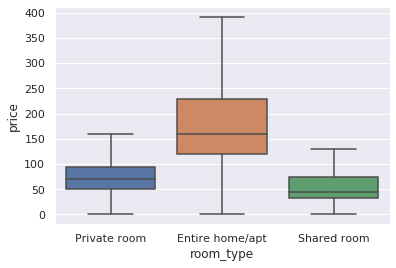

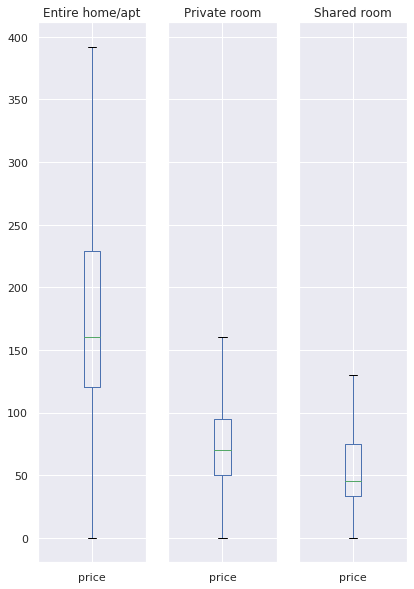

In [ ]:
# Boxplot #1: 

sns.boxplot(y='price', x='room_type', data= airbnb_df, showfliers=False)

#Boxplot #2: 
df1 = airbnb_df.groupby('room_type')
axes = df1.boxplot(column='price', layout=(1,9), figsize=(20,10), showfliers = False )


*Findings*

We can see from this analysis that entire places / appartments are more expensive than private rooms. We had hypothesized in our proposal that they would be 40% more. The actual price difference however is almost 147%. 

The Airbnb team should consider promoting the renting of an entire appartment, to people who rent out a room in that appartment. This would potentially increase profit margins. 

Another strategy to consider would be to promote room sharing: Although there is statistical significance between the price of rooms and shared rooms, if rooms were shared, therere would be twice as much revenue and more customers. 

There are limits to this strategy however, as this may take away from people who would want to rent private rooms.  More analysis would be needed. 


**3) Analyzing a relationship exists between price and number of reviews.**

We want to check if there is a correlation between the number of reviews and the price of the listing. 
We us the corr() method to calculate the Pearson correlation coefficient.
Since the coefficient is close to 0, this means there appears to be no relationship. We will need to dig in deeper.

In [ ]:
airbnb_df[['price','number_of_reviews','reviews_per_month']].corr()

,price,number_of_reviews,reviews_per_month
price,1.000000,-0.047954,-0.030608
number_of_reviews,-0.047954,1.000000,0.549868
reviews_per_month,-0.030608,0.549868,1.000000


We create 3 different databases:

1) One that contains the records for all listings with less than 50 reviews. 

2) One that contains the records for all listings with 50 or more reviews. 

3) One that contains the records for all listings with no reviews. 


In [ ]:
Less_Reviews = (airbnb_df['number_of_reviews'] < 50)
Less_Reviews_df = airbnb_df[Less_Reviews.values]
Less_Reviews_df.head()

More_Reviews = (airbnb_df['number_of_reviews'] >= 50)
More_Reviews_df = airbnb_df[More_Reviews.values]
More_Reviews_df.head()

No_Reviews = (airbnb_df['number_of_reviews'] == 0)
No_Reviews_df = airbnb_df[No_Reviews.values]
No_Reviews_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365


We then get the mean for each dataset.

In [ ]:
Less_Reviews_mean_price = Less_Reviews_df['price'].mean()
More_Reviews_mean_price = More_Reviews_df['price'].mean()
No_Reviews_mean_price = No_Reviews_df['price'].mean()

print('The mean price of places with less than 50 reviews is: '+ str(Less_Reviews_mean_price))
print('The mean price of places with more than 50 reviews is: '+ str(More_Reviews_mean_price))
print('The mean price of places with no reviews is: '+ str(No_Reviews_mean_price))


The mean price of places with less than 50 reviews is: 156.76012818673172
The mean price of places with more than 50 reviews is: 128.86739161135432
The mean price of places with no reviews is: 192.9190210903303


**The following information is interesting. It appears that as there are more reviews, the price actually tends to be lower!**

We test out to see if there is any statistical significance in these differences.


In [ ]:
sample_1_n = Less_Reviews_df.shape[0]
sample_2_n = More_Reviews_df.shape[0]
sample_1_mean = Less_Reviews_df['price'].mean()
sample_2_mean = More_Reviews_df['price'].mean()
sample_1_var = Less_Reviews_df['price'].var()
sample_2_var = More_Reviews_df['price'].var()

std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print('The mean price of a room with less than 50 reviews is: ' + str(sample_1_mean))
print('The mean price of a room with more than 50 reviews is: ' + str(sample_2_mean))
print(' ')
print("The difference in means at the 95% confidence interval is between "+ str(ci_lower)+" and "+str(ci_upper)+".")

The mean price of a room with less than 50 reviews is: 156.76012818673172
The mean price of a room with more than 50 reviews is: 128.86739161135432
 
The difference in means at the 95% confidence interval is between -31.33621201365649 and -24.449261137098308.


In [ ]:
Less_Reviews = (airbnb_df['number_of_reviews'] < 50)
Less_Reviews_df = airbnb_df[Less_Reviews.values]
Less_Reviews_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0


The following boxplot shows the distribution of the listings with less than 50 reviews. The median appears to be ~ 110.

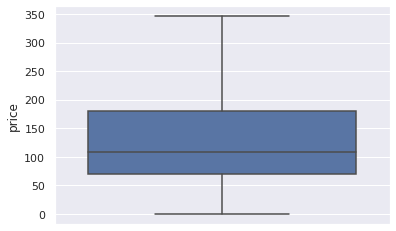

In [ ]:
sns.boxplot(y='price', data= Less_Reviews_df, showfliers=False )


The following boxplot shows the distribution of the listings with more than 50 reviews. The median appears to be ~ 100.

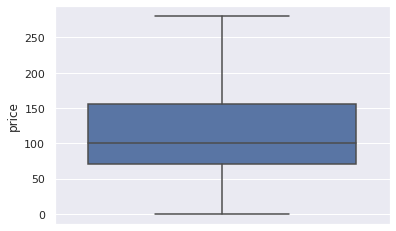

In [ ]:
sns.boxplot(y='price', data= More_Reviews_df, showfliers=False )

The following boxplot shows the distribution of the listings with no reviews. The median appears to be ~ 120.

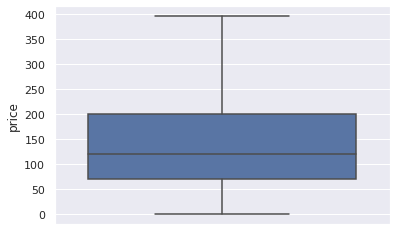

In [ ]:
sns.boxplot(y='price', data= No_Reviews_df, showfliers=False )

*Findings*

From this analysis, it appears that statistical significance exists between the means of listings with over 50 reviews and those with less than 50. With 95% confidence, the difference in the means will be between ~31 and ~24, indicating that listings with more reviews are anywhere between 19% and 15% less expensive. 

Therefore, our hypothesis was proven wrong and we must re-evaluate why this may be. We also need to re-think what we would do in a future analysis. 

1) Ideally, for future analysis, we would want to get the actual average rating for each listing instead of the number of reviews for each. One possible explanation is that people are more tempted to leave negative reviews than positive ones, and therefore the price is lower for the listings with the most reviews.  

2) Originally, we hypothesized that with the increased effect of "brand recognition" that a listing would benefit from more exposure and reviews, an owner could charge a higher price. The data has shown that this hypothesis has been proven false. It is possible that prices might have a negative correlation with increased reviews. 

3) Another factor we would need to check is the number of nights actually booked. It is possible that listings with high prices are not getting reviews because these listings are not getting booked at all! Thus, Airbnb would not be making any profit on it. It is therefore possible that lower prices actually will generate more reviews and this was the fallacy in our original hypothesis. 